In [43]:
import numpy as np
from random import randint
import matplotlib.pyplot as plt
from collections import deque 
import random
import time
MIN_X = -100
MIN_Y = -100
MIN_Z = 0
MAX_X = 100
MAX_Y = 100
MAX_Z = 50
NUMBER_OF_CONNECTIONS = 2
NUMBER_OF_CITIES = 4


class City:
    def __init__(self) -> None:
        self.cords = np.array([
            randint(MIN_X, MAX_X),
            randint(MIN_Y, MAX_Y),
            randint(MIN_Z, MAX_Z)
        ])
        self.distances = []


class WebOfCities:
    def __init__(self, number_of_cities) -> None:
        self.number_of_cities = number_of_cities
        self.cities = []
        self.create_list_of_cities()

    def create_list_of_cities(self):
        self.cities = [City() for _ in range(0, self.number_of_cities)]

    def create_weighted_connections_100(self):
        for city in self.cities:
            distance = []
            for i in range(0, self.number_of_cities):
                if city.cords[2]  > self.cities[i].cords[2]:
                    distance.append(np.linalg.norm(city.cords - self.cities[i].cords)*0.9)
                elif city.cords[2]  < self.cities[i].cords[2]:
                    distance.append(np.linalg.norm(city.cords - self.cities[i].cords)*1.1)
                else:
                    distance.append(np.linalg.norm(city.cords - self.cities[i].cords))
            city.distances = distance

    def create_weighted_connections_80(self):
        for city in self.cities:
            distance = []
            for i in range(0, self.number_of_cities):
                if city.cords[2]  > self.cities[i].cords[2]:
                    actual_distance = np.linalg.norm(city.cords - self.cities[i].cords)*0.9
                elif city.cords[2]  < self.cities[i].cords[2]:
                    actual_distance = np.linalg.norm(city.cords - self.cities[i].cords)*1.1
                else:
                    actual_distance = np.linalg.norm(city.cords - self.cities[i].cords)
                if random.random() > 0.2:
                    distance.append(actual_distance)
                else:
                    distance.append(0)
            city.distances = distance

    def create_connections_100(self):
        for city in self.cities:
            distance = [np.linalg.norm(city.cords - self.cities[i].cords) for i in range(0, len(self.cities))]
            city.distances = distance
    
    def create_connections_80(self):
        for city in self.cities:
            distance = []
            for i in range(0, self.number_of_cities):
                if random.random() > 0.2:
                    distance.append(np.linalg.norm(city.cords - self.cities[i].cords))
                else:
                    distance.append(0)
            city.distances = distance

class Graph:
    def __init__(self, cities) -> None:
        self.cities = cities

    def create_adjacency_matrix(self):
        adjacency_matrix_ls = []
        for city in self.cities:
            list_of_distance = []
            for distance in city.distances:
                list_of_distance.append(distance)
            adjacency_matrix_ls.append(list_of_distance)
        adjacency_matrix = np.array(adjacency_matrix_ls)
        return adjacency_matrix

    def create_adjacency_weighted_matrix(self):
        adjacency_matrix_ls = []
        for city in self.cities:
            list_of_distance = []
            for distance in city.distances:
                list_of_distance.append(distance)
            adjacency_matrix_ls.append(list_of_distance)
        adjacency_matrix = np.array(adjacency_matrix_ls)
        return adjacency_matrix


In [44]:
class PathCounter:
    def __init__(self, adjacency_matrix, all_paths) -> None:
        self.adjacency_matrix = adjacency_matrix
        self.all_paths = all_paths
        self.all_distances = []
        self.index_of_min_distance = 0

    def count_all_distances(self):
        for path in self.all_paths:
            distance = 0
            for i in range(len(path)-1):
                distance += self.adjacency_matrix[path[i]][path[i+1]]
                # if self.adjacency_matrix[path[i]][path[i+1]] == 0:
                #    print("error")
            self.all_distances.append(distance)

    def count_path(self):
        distance = 0
        for i in range(len(self.all_paths)-1):
            distance += self.adjacency_matrix[self.all_paths[i]][self.all_paths[i+1]]
                # if self.adjacency_matrix[path[i]][path[i+1]] == 0:
                #    print("error")
        print(f"min distance is {distance} for path")
        print(self.all_paths)
        return self.all_paths

    def print_min_possible_path(self):
        min_distance = min(self.all_distances)
        self.index_of_min_distance = self.all_distances.index(min_distance)
        print(f"min distance is {min_distance} for path")
        print(self.all_paths[self.index_of_min_distance])
        return self.all_paths[self.index_of_min_distance]
            


In [45]:
class BranchAlgorytm:
    def __init__(self, graph, start) -> None:
        self.graph = graph
        self.start = start

    def tsp_dfs(self):
        all_paths = []
        num_cities = len(self.graph)
        stack = deque([[self.start]])

        while stack:
            path = stack.popleft()
            curr_city = path[-1]

            if len(path) == num_cities:
                last_city = path[-1]
                if self.graph[last_city][0] != 0:
                    path.append(0)
                    all_paths.append(path)
                    #print(path)
                continue

            for next_city in range(num_cities):
                if next_city not in path and self.graph[curr_city][next_city] != 0:
                    stack.append(path + [next_city])
                    #print(stack)

        return all_paths
    
    def tsp_bfs(self):
        all_paths = []
        num_cities = len(self.graph)
        stack = deque([[self.start]])

        while stack:
            path = stack.pop()
            curr_city = path[-1]

            if len(path) == num_cities:
                last_city = path[-1]
                if self.graph[last_city][0] != 0:
                    path.append(0)
                    all_paths.append(path)
                    #print(path)
                continue

            for next_city in range(num_cities):
                if next_city not in path and self.graph[curr_city][next_city] != 0:
                    stack.append(path + [next_city])
                    #print(stack)

        return all_paths


In [46]:
class AlgorytmManagerNN():
    def __init__(self, start_city, adjacency_matrix) -> None:
        self.start_city = start_city
        self.adjacency_matrix = adjacency_matrix
        self.copy_adjacency_matrix = np.copy(adjacency_matrix)

    def NN_algorytm(self):
        current_city = self.start_city
        visited_cities = [self.start_city]
        max_distance_in_matrix = self.adjacency_matrix.max() + 1
        while len(visited_cities) != len(self.adjacency_matrix):
            dist_from_cur_cit = self.adjacency_matrix[current_city,:]
            dist_from_cur_cit = np.ma.masked_equal(dist_from_cur_cit, 0.0, copy=False)
            min_dis_from_cur_cit = dist_from_cur_cit.min()
            index_of_nearest_city = np.where(dist_from_cur_cit == min_dis_from_cur_cit)
            #print(index_of_nearest_city)
            index_of_nearest_city = index_of_nearest_city[0][0]
            if not index_of_nearest_city in visited_cities:
                visited_cities.append(index_of_nearest_city)
                current_city = index_of_nearest_city
                #print(index_of_nearest_city)
            else:
                self.adjacency_matrix[current_city][index_of_nearest_city] = max_distance_in_matrix
            dist_from_cur_cit = self.adjacency_matrix[current_city,:]
            dead_end = (dist_from_cur_cit == max_distance_in_matrix) | (dist_from_cur_cit == 0)
            if dead_end.all():
                return "no path"
        last_visited_city = visited_cities[-1]
        if self.adjacency_matrix[last_visited_city][0] != 0:
            visited_cities.append(0)
        else:
            return "connection with 0 doesn't exist"
        return visited_cities

    def NN_algorytm_V2(self):
        visited_cities = [self.start_city]
        current_city = self.start_city
        max_distance_in_matrix = self.adjacency_matrix.max() + 1
        #seckond_dead_end = False
        dead_ends_list = []
        while len(visited_cities) != len(self.adjacency_matrix):
            dist_from_cur_cit = self.adjacency_matrix[current_city,:]
            dist_from_cur_cit = np.ma.masked_equal(dist_from_cur_cit, 0.0, copy=False)
            min_dis_from_cur_cit = dist_from_cur_cit.min()
            index_of_nearest_city= np.where(dist_from_cur_cit == min_dis_from_cur_cit)
            index_of_nearest_city = index_of_nearest_city[0][0]
            if not index_of_nearest_city in visited_cities:
                visited_cities.append(index_of_nearest_city)
                current_city = index_of_nearest_city
            else:
                self.adjacency_matrix[current_city][index_of_nearest_city] = max_distance_in_matrix
            dist_from_cur_cit = self.adjacency_matrix[current_city,:]
            dead_end = (dist_from_cur_cit == max_distance_in_matrix) | (dist_from_cur_cit == 0)
            if dead_end.all():
                dead_end_city = visited_cities.pop()
                dead_ends_list.append(dead_end_city)
                dead_ends_list = list(set(dead_ends_list))
                dist_from_cur_cit = self.adjacency_matrix[visited_cities[-1],:]
                for city in visited_cities:
                    dist_from_cur_cit[city] = max_distance_in_matrix
                arr_filtered = dist_from_cur_cit[(dist_from_cur_cit != 0) | (dist_from_cur_cit == max_distance_in_matrix)]
                second_smallest = np.partition(arr_filtered, 1)[1]
                index_of_nearest_city = np.where(dist_from_cur_cit == second_smallest)
                current_city = index_of_nearest_city[0][0]
                self.adjacency_matrix = np.copy(self.copy_adjacency_matrix)
                visited_cities.append(current_city)
                if len(dead_ends_list) > 1 or second_smallest == max_distance_in_matrix:
                    return "seckond dead_end"
                #seckond_dead_end = True
        last_visited_city = visited_cities[-1] 
        if self.adjacency_matrix[last_visited_city][0] != 0:
            visited_cities.append(0)
        else:
            return "connection with 0 doesn't exist"
        return visited_cities

In [47]:
class CitiesDrawer:
    def __init__(self, cities, best_path) -> None:
        self.cities = cities
        self.best_path = best_path
        self.X_cords = []
        self.Y_cords = []

    def _get_XY_cords_of_cities(self):
        for city_idx in self.best_path:
            self.X_cords.append(self.cities[city_idx].cords[0])
            self.Y_cords.append(self.cities[city_idx].cords[1])

    def draw_cities(self):
        self._get_XY_cords_of_cities()

        plt.scatter(self.X_cords, self.Y_cords, color='blue')

        for i in range(len(self.cities) - 1):
            plt.plot([self.X_cords[i], self.X_cords[i + 1]], [self.Y_cords[i], self.Y_cords[i + 1]], color='blue')

        plt.plot([self.X_cords[len(self.cities) - 1], self.X_cords[0]], [self.Y_cords[len(self.cities) - 1], self.Y_cords[0]], color='blue')

Wszystkie miasta są połączone, połączenia nie mają wag

In [48]:
START_CITY = 0
NUMBER_OF_CITIES_IN_WEB = 9

web = WebOfCities(NUMBER_OF_CITIES_IN_WEB)
graph = Graph(web.cities)
web.create_connections_100()
adjacency_matrix = graph.create_adjacency_matrix()

Algorytm BFS/DFS

DFS_100_NW Time = 0.07431507110595703
min distance is 709.0467344453327 for path
[0, 4, 5, 3, 8, 6, 1, 2, 7, 0]
BFS_100_NW Time = 0.10262203216552734
min distance is 709.0467344453327 for path
[0, 4, 5, 3, 8, 6, 1, 2, 7, 0]


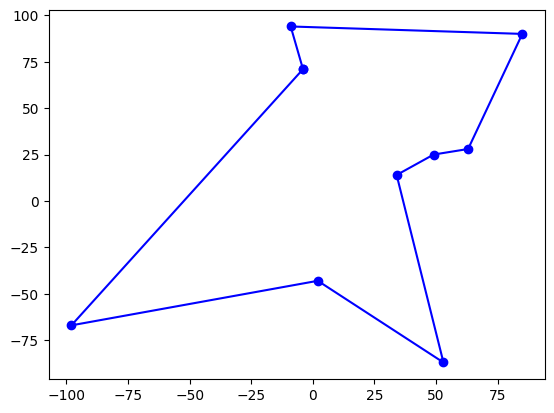

In [49]:
branch_algorytms = BranchAlgorytm(adjacency_matrix, START_CITY)
start = time.time()
all_paths = branch_algorytms.tsp_dfs()
end = time.time()
print(f"DFS_100_NW Time = {end - start}")
path_counter = PathCounter(adjacency_matrix, all_paths)
path_counter.count_all_distances()
path_counter.print_min_possible_path()

start = time.time()
all_paths = branch_algorytms.tsp_bfs()
end = time.time()
print(f"BFS_100_NW Time = {end - start}")
path_counter = PathCounter(adjacency_matrix, all_paths)
path_counter.count_all_distances()
best_path = path_counter.print_min_possible_path()

cities_drawer = CitiesDrawer(web.cities, best_path)
cities_drawer.draw_cities()

Algorytm NN

NN_100_NW Time = 0.0014407634735107422
min distance is 806.9081530811173 for path
[0, 4, 8, 3, 6, 2, 1, 7, 5, 0]


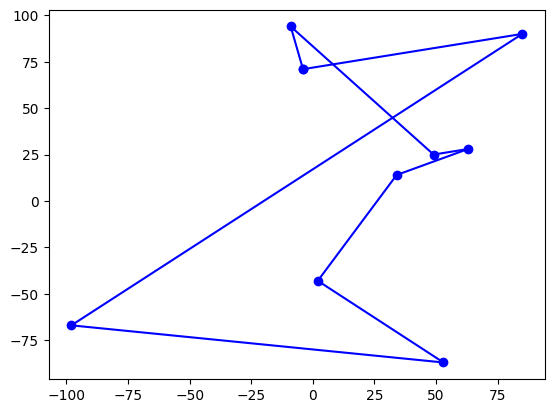

In [50]:
algorytm_manager_1 = AlgorytmManagerNN(0, adjacency_matrix=adjacency_matrix)
start = time.time()
path = algorytm_manager_1.NN_algorytm()
end = time.time()
print(f"NN_100_NW Time = {end - start}")
path_counter = PathCounter(adjacency_matrix, path)
best_path = path_counter.count_path()

cities_drawer = CitiesDrawer(web.cities, best_path)
cities_drawer.draw_cities()

Algorytm NN V2

NN2_100_NW Time = 0.0005240440368652344
min distance is 806.9081530811173 for path
[0, 4, 8, 3, 6, 2, 1, 7, 5, 0]


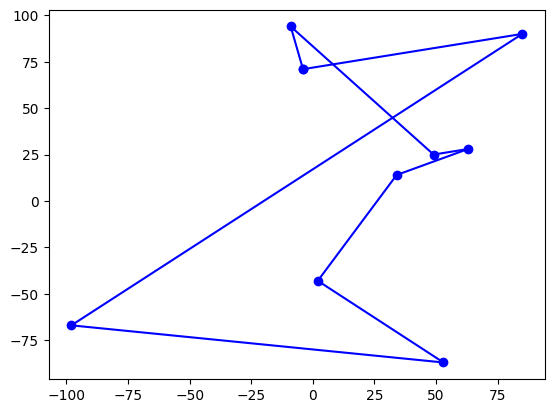

In [51]:

algorytm_manager_2 = AlgorytmManagerNN(0, adjacency_matrix=adjacency_matrix)
start = time.time()
path = algorytm_manager_2.NN_algorytm_V2()
end = time.time()
print(f"NN2_100_NW Time = {end - start}")
path_counter = PathCounter(adjacency_matrix, path)
best_path = path_counter.count_path()

cities_drawer = CitiesDrawer(web.cities, best_path)
cities_drawer.draw_cities()

Miasta posiadają 80% połączeń, połączenia nie mają wag

In [52]:
web = WebOfCities(NUMBER_OF_CITIES_IN_WEB)
graph = Graph(web.cities)
web.create_connections_80()
adjacency_matrix = graph.create_adjacency_matrix()

Algorytm BFS/DFS

DFS_80_NW Time = 0.03226304054260254
min distance is 508.5772061425702 for path
[0, 6, 2, 5, 8, 7, 1, 3, 4, 0]
BFS_80_NW Time = 0.030293941497802734
min distance is 508.5772061425702 for path
[0, 6, 2, 5, 8, 7, 1, 3, 4, 0]


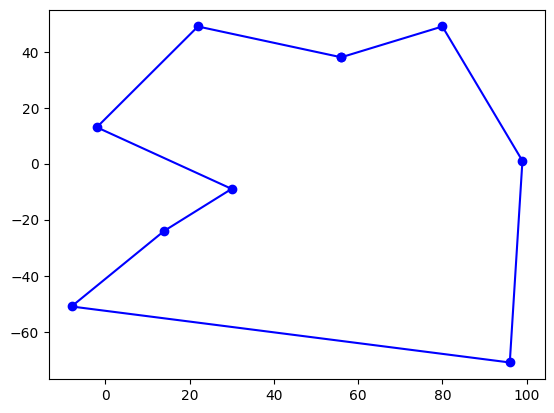

In [53]:
branch_algorytms = BranchAlgorytm(adjacency_matrix, START_CITY)
start = time.time()
all_paths = branch_algorytms.tsp_dfs()
end = time.time()
print(f"DFS_80_NW Time = {end - start}")
try:
    path_counter = PathCounter(adjacency_matrix, all_paths)
    path_counter.count_all_distances()
    best_path = path_counter.print_min_possible_path()

    cities_drawer = CitiesDrawer(web.cities, best_path)
    cities_drawer.draw_cities()
except:
    print("No path")

start = time.time()
all_paths = branch_algorytms.tsp_bfs()
end = time.time()
print(f"BFS_80_NW Time = {end - start}")
try:
    path_counter = PathCounter(adjacency_matrix, all_paths)
    path_counter.count_all_distances()
    path_counter.print_min_possible_path()
except:
    print("No path")

Algorytm NN

NN_80_NW Time = 0.001394033432006836
min distance is 508.5772061425702 for path
[0, 6, 2, 5, 8, 7, 1, 3, 4, 0]


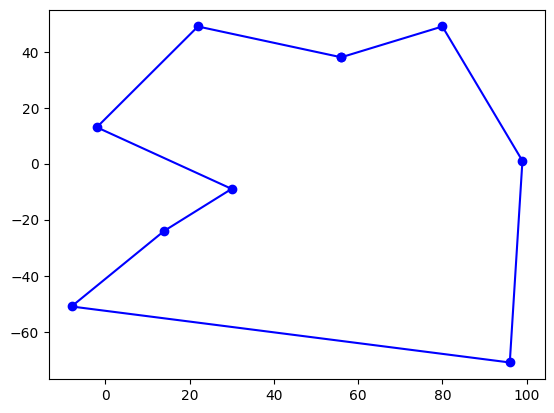

In [54]:
algorytm_manager_1 = AlgorytmManagerNN(0, adjacency_matrix=adjacency_matrix)
start = time.time()
path = algorytm_manager_1.NN_algorytm()
end = time.time()
print(f"NN_80_NW Time = {end - start}")
try:
    path_counter = PathCounter(adjacency_matrix, path)
    best_path = path_counter.count_path()

    cities_drawer = CitiesDrawer(web.cities, best_path)
    cities_drawer.draw_cities()
except:
    print(path)

Algorytm NN V2

NN2_80_NW Time = 0.0005037784576416016
min distance is 508.5772061425702 for path
[0, 6, 2, 5, 8, 7, 1, 3, 4, 0]


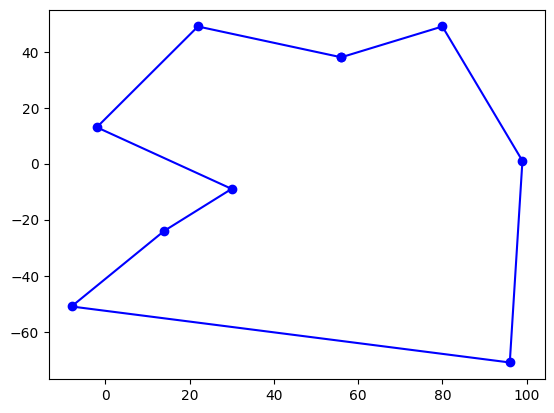

In [55]:
algorytm_manager_2 = AlgorytmManagerNN(0, adjacency_matrix=adjacency_matrix)
start = time.time()
path = algorytm_manager_2.NN_algorytm_V2()
end = time.time()
print(f"NN2_80_NW Time = {end - start}")
try:
    path_counter = PathCounter(adjacency_matrix, path)
    best_path = path_counter.count_path()

    cities_drawer = CitiesDrawer(web.cities, best_path)
    cities_drawer.draw_cities()
except:
    print(path)

Wszystkie miasta są połączone, połączenia mają wagi

In [56]:
web = WebOfCities(NUMBER_OF_CITIES_IN_WEB)
graph = Graph(web.cities)
web.create_weighted_connections_100()
adjacency_matrix = graph.create_adjacency_weighted_matrix()
#print(adjacency_matrix)

Algorytm BFS/DFS

DFS_100_W Time = 0.10339617729187012
min distance is 686.6373819052264 for path
[0, 7, 2, 1, 5, 8, 6, 4, 3, 0]
BFS_100_W Time = 0.07491707801818848
min distance is 686.6373819052264 for path
[0, 7, 2, 1, 5, 8, 6, 4, 3, 0]


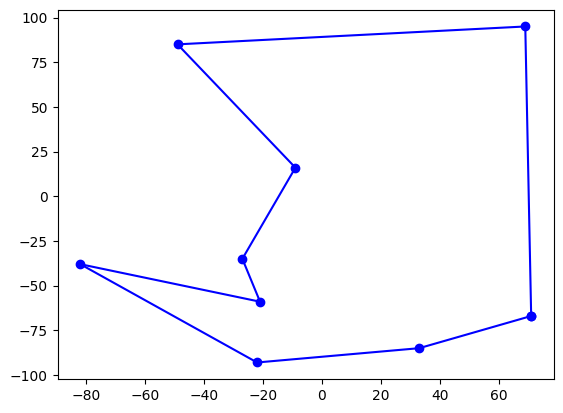

In [57]:
branch_algorytms = BranchAlgorytm(adjacency_matrix, START_CITY)
start = time.time()
all_paths = branch_algorytms.tsp_dfs()
end = time.time()
print(f"DFS_100_W Time = {end - start}")
path_counter = PathCounter(adjacency_matrix, all_paths)
path_counter.count_all_distances()
best_path = path_counter.print_min_possible_path()

cities_drawer = CitiesDrawer(web.cities, best_path)
cities_drawer.draw_cities()

start = time.time()
all_paths = branch_algorytms.tsp_bfs()
end = time.time()
print(f"BFS_100_W Time = {end - start}")
path_counter = PathCounter(adjacency_matrix, all_paths)
path_counter.count_all_distances()
path_counter.print_min_possible_path();

Algorytm NN

NN_100_W Time = 0.0010399818420410156
min distance is 735.6238950613042 for path
[0, 7, 5, 8, 1, 2, 6, 4, 3, 0]


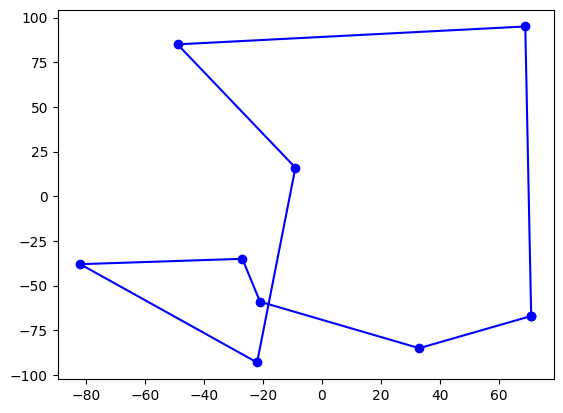

In [58]:
algorytm_manager_1 = AlgorytmManagerNN(0, adjacency_matrix=adjacency_matrix)
start = time.time()
path = algorytm_manager_1.NN_algorytm()
end = time.time()
print(f"NN_100_W Time = {end - start}")
path_counter = PathCounter(adjacency_matrix, path)
best_path = path_counter.count_path()

cities_drawer = CitiesDrawer(web.cities, best_path)
cities_drawer.draw_cities()

Algorytm NN V2

NN2_100_W Time = 0.0005180835723876953
min distance is 735.6238950613042 for path
[0, 7, 5, 8, 1, 2, 6, 4, 3, 0]


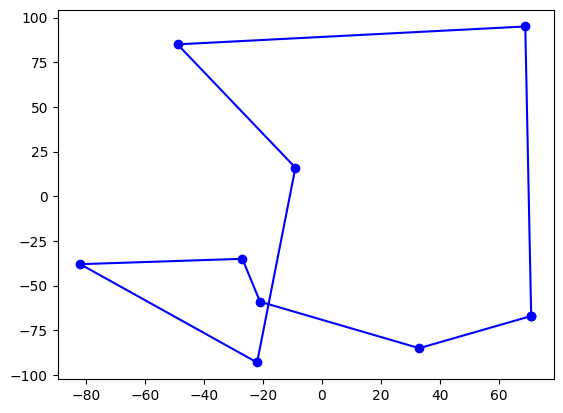

In [59]:
algorytm_manager_2 = AlgorytmManagerNN(0, adjacency_matrix=adjacency_matrix)
start = time.time()
path = algorytm_manager_2.NN_algorytm_V2()
end = time.time()
print(f"NN2_100_W Time = {end - start}")
path_counter = PathCounter(adjacency_matrix, path)
best_path = path_counter.count_path()

cities_drawer = CitiesDrawer(web.cities, best_path)
cities_drawer.draw_cities()

Miasta posiadają 80% połączeń, połączenia mają wagi

In [60]:
web = WebOfCities(NUMBER_OF_CITIES_IN_WEB)
graph = Graph(web.cities)
web.create_weighted_connections_80()
adjacency_matrix = graph.create_adjacency_weighted_matrix()

Algorytm BFS/DFS

DFS_80_W Time = 0.02467489242553711
min distance is 573.5977401126929 for path
[0, 1, 7, 6, 5, 4, 2, 8, 3, 0]
BFS_80_W Time = 0.046320199966430664
min distance is 573.5977401126929 for path
[0, 1, 7, 6, 5, 4, 2, 8, 3, 0]


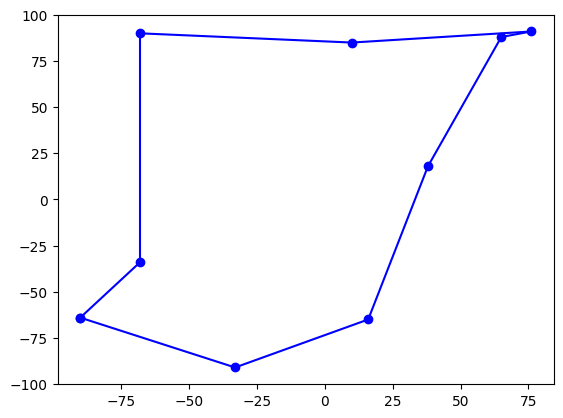

In [61]:
branch_algorytms = BranchAlgorytm(adjacency_matrix, START_CITY)
start = time.time()
all_paths = branch_algorytms.tsp_dfs()
end = time.time()
print(f"DFS_80_W Time = {end - start}")
try:
    path_counter = PathCounter(adjacency_matrix, all_paths)
    path_counter.count_all_distances()
    best_path = path_counter.print_min_possible_path()

    cities_drawer = CitiesDrawer(web.cities, best_path)
    cities_drawer.draw_cities()
except:
    print("No path")

start = time.time()
all_paths = branch_algorytms.tsp_bfs()
end = time.time()
print(f"BFS_80_W Time = {end - start}")
try:
    path_counter = PathCounter(adjacency_matrix, all_paths)
    path_counter.count_all_distances()
    path_counter.print_min_possible_path()
except:
    print("No path")

Algorytm NN

NN_80_W Time = 0.0009729862213134766
min distance is 837.1046965842638 for path
[0, 1, 3, 2, 8, 6, 4, 5, 7, 0]


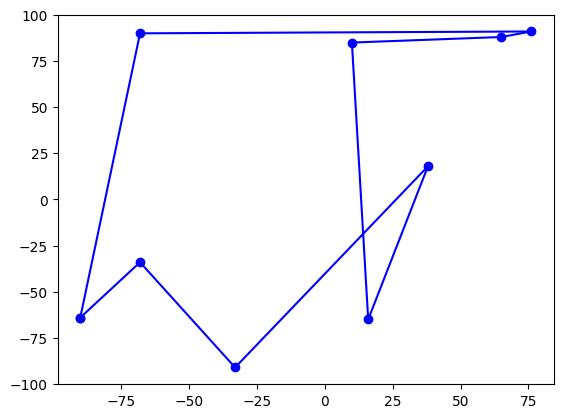

In [62]:
algorytm_manager_1 = AlgorytmManagerNN(0, adjacency_matrix=adjacency_matrix)
start = time.time()
path = algorytm_manager_1.NN_algorytm()
end = time.time()
print(f"NN_80_W Time = {end - start}")
try:
    path_counter = PathCounter(adjacency_matrix, path)
    best_path = path_counter.count_path()

    cities_drawer = CitiesDrawer(web.cities, best_path)
    cities_drawer.draw_cities()
except:
    print("No path")

Algorytm NN V2

NN2_80_W Time = 0.0005199909210205078
min distance is 837.1046965842638 for path
[0, 1, 3, 2, 8, 6, 4, 5, 7, 0]


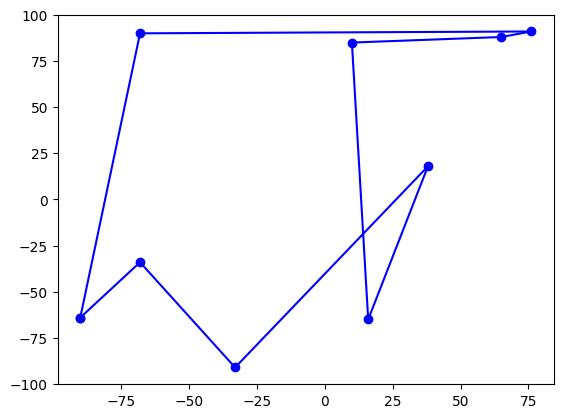

In [63]:

algorytm_manager_2 = AlgorytmManagerNN(0, adjacency_matrix=adjacency_matrix)
start = time.time()
path = algorytm_manager_2.NN_algorytm_V2()
end = time.time()
print(f"NN2_80_W Time = {end - start}")
try:
    path_counter = PathCounter(adjacency_matrix, path)
    best_path = path_counter.count_path()

    cities_drawer = CitiesDrawer(web.cities, best_path)
    cities_drawer.draw_cities()
except:
    print("No path")